# Read Me!
The purpose of this code is to read a directory of CDF files, concatenate them into a single CDF file, and save the data into a CSV format so that it can more easily be imported and read. The code will also create a dataframe, which can be used in analysis, plotting, etc.

If using the Solar Orbiter Archive, you can use the Search tab to query all files of a certain instrument in a given time range (the file names will be consistent). If you are logged in, you can simply "download all", and you will recieve a download link from the Solar Orbiter Archive containing a compressed file containing all of the data within the query. Extract the folder from the compressed file, and note the directory to which it is saved.

NOTE: the extracted folder typically has a folder called "/science/...". The directory we want is where that specific folder is saved; in this case, I made folder on my desktop called "testfolder"

# Initialization
Import/install necessesary modules

In [13]:
try: 
    import os
    from IPython.display import clear_output
    from pathlib import Path
    import xarray as xr
    import pandas as pd
    from cdflib.xarray import cdf_to_xarray, xarray_to_cdf
except:
    !pip install os
    !pip install IPython.display
    !pip install pathlib
    !pip install xarray
    !pip install pandas
    !pip install cdflib.xarray
    import os
    from IPython.display import clear_output
    from pathlib import Path
    import xarray as xr
    import pandas as pd
    from cdflib.xarray import cdf_to_xarray, xarray_to_cdf
clear_output(wait=True)
print("Done!")

Done!


# Define Data Directory

In [9]:
# directory where data folder is extracted:
dir_data = "C:/Users/Daniel/Desktop/testfolder/"
filename_data = "data"
# index which we want to concatenate along (usually EPOCH)
cdf_index = "EPOCH"

print("Immediate subfolder(s):")
print([x for x in Path(dir_data).iterdir() if x.is_dir()])
print("Total number of CDF files found: " + str(len(list(Path(dir_data).glob('**/*.cdf')))) )

Immediate subfolder(s):
[WindowsPath('C:/Users/Daniel/Desktop/testfolder/science')]
Total number of CDF files found: 13


If you want a preview of the file, in order to diagnose issues or plot rudimentary data, you can use the cdflib and xarray module to access the data within a file, given it's exact location:

In [10]:
datapart_xr_raw = cdf_to_xarray("C:/Users/Daniel/Desktop/testfolder/science/swa/L3/2022/solo_L3_swa-his-comp-10min_20220107_V02.cdf", to_datetime=True, fillval_to_nan=True)
dims_toclean = list( set(datapart_xr_raw.dims.mapping.keys()) - set(datapart_xr_raw.indexes) )
datapart_xr = datapart_xr_raw.drop_dims(dims_toclean,errors='ignore')
datapart_xr

<xarray.Dataset> Size: 67kB
Dimensions:            (EPOCH: 131, O_CHARGES: 4, C_CHARGES: 3, FE_CHARGES: 15,
                        SI_CHARGES: 7, NE_CHARGES: 4, MG_CHARGES: 7,
                        N_CHARGES: 2, S_CHARGES: 9)
Coordinates: (12/17)
  * EPOCH              (EPOCH) datetime64[ns] 1kB 2022-01-07T02:12:54.023400 ...
  * O_CHARGES          (O_CHARGES) int16 8B 5 6 7 8
    O_CHARGE_LABELS    (O_CHARGES) <U1 16B '5' '6' '7' '8'
  * C_CHARGES          (C_CHARGES) int16 6B 4 5 6
    C_CHARGE_LABELS    (C_CHARGES) <U1 12B '4' '5' '6'
  * FE_CHARGES         (FE_CHARGES) int16 30B 6 7 8 9 10 11 ... 16 17 18 19 20
    ...                 ...
  * MG_CHARGES         (MG_CHARGES) int16 14B 6 7 8 9 10 11 12
    MG_CHARGE_LABELS   (MG_CHARGES) <U2 56B '6' '7' '8' '9' '10' '11' '12'
  * N_CHARGES          (N_CHARGES) int16 4B 5 6
    N_CHARGE_LABELS    (N_CHARGES) <U1 8B '5' '6'
  * S_CHARGES          (S_CHARGES) int16 18B 6 7 8 9 10 11 12 13 14
    S_CHARGE_LABELS    (S_CHARGES) <U2 72B '6' '7' '8' '9' ... '12' '14' '14'
Data variables: (12/100)
    ACCUM_SECONDS      (EPOCH) float64 1kB 517.3 518.1 518.1 ... 518.1 388.6
    QUALITY_FLAG       (EPOCH) int16 262B 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    QUALITY_BITMASK    (EPOCH) uint16 262B 4 4 4 4 4 4 4 4 4 ... 4 4 4 4 4 4 4 4
    AZIMUTH_SOURCE     (EPOCH) int16 262B 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    SW_TYPE            (EPOCH) int16 262B -32768 -32768 -32768 ... -32768 -32768
    NUMBER_OF_SCANS    (EPOCH) int16 262B 20 20 20 20 20 20 ... 20 20 20 20 15
    ...                 ...
    S_O_ABUN           (EPOCH) float32 524B nan nan nan nan ... nan nan nan nan
    S_O_ABUN_ERR       (EPOCH) float32 524B nan nan nan nan ... nan nan nan nan
    S_O_ABUN_QF        (EPOCH) int16 262B 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2
    N_O_ABUN           (EPOCH) float32 524B nan nan nan nan ... nan nan nan nan
    N_O_ABUN_ERR       (EPOCH) float32 524B nan nan nan nan ... nan nan nan nan
    N_O_ABUN_QF        (EPOCH) int16 262B 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2
Attributes: (12/34)
    Acknowledgement:             ['Please acknowledge Chris J. Owen (SWA PI -...
    Data_product:                ['comp-10min>10-minutes solar wind heavy ion...
    Data_type:                   ['L3>Level 3 Data']
    Data_version:                ['02']
    Descriptor:                  ['SWA-HIS-COMP-10MIN>Solar Wind Analyzer, He...
    Discipline:                  ['Space Physics>Interplanetary Studies']
    ...                          ...
    TARGET_NAME:                 ['interplanetary_medium']
    TARGET_REGION:               ['Solar Wind']
    TEXT:                        ['Level 3 data for HIS instrument', 'Time se...
    TIME_MAX:                    ['2022-01-07T23:52:55Z']
    TIME_MIN:                    ['2022-01-07T02:12:54Z']
    Time_resolution:             ['10min']

# Define Helper Functions

In [3]:
# define helper function to concatenate all CDF files in a directory into a single xarray:
def dir_to_xr(dir_data,dim_name="EPOCH",verbose=False):
    # create Path object from input directory:
    p = Path(dir_data)
    # create list of CDF files within subdirectories of given path:
    files = list(p.glob('**/*.cdf'))
    
    list_datapart_xr = []
    n = 0
    for ff in files:
        # for each CDF file:
        if verbose:
            # print progress of operation:
            num = 100*(n/len(files))
            formatted_num = "{:.2f}".format(num)
            print("Concatenating CDF files in "+dir_data+"; Completion: " + formatted_num + "%")
            
        try:
            # convert CDF file to xarray:
            datapart_xr_raw = cdf_to_xarray(ff, to_datetime=True, fillval_to_nan=True)
            # cdf_to_xarray adds "record" and "dim" dimensions, need to be removed.
            # create list of dimensions which are not indexes in the original CDF file:
            dims_toclean = list( set(datapart_xr_raw.dims.mapping.keys()) - set(datapart_xr_raw.indexes) )
            # drop these excessive dimensions from the xarray:
            datapart_xr = datapart_xr_raw.drop_dims(dims_toclean,errors='ignore')
        except:
            print("Couldn't convert to xarray:")
            print(ff)
            
        try:
            # add xarray to list of xarrays
            list_datapart_xr.append(datapart_xr)
        except:
            print("Couldn't append:")
            print(ff)

        n = n + 1
        clear_output(wait=True)
    clear_output(wait=True)

    # concatenate all xarrays in list along specified dimension (usually EPOCH or some variant)
    xr_ret = xr.concat(list_datapart_xr,dim=dim_name)
    
    print("Finished converting and concatenating CDF files in " + dir_data + " to xarray!")
    return xr_ret
    

# Convert Directory to Concatenated CSV

In [11]:
if os.path.isfile(dir_data+filename_data+".csv"):
    # if the desired file already exists, we can simply read the CSV file:
    df_data = pd.read_csv(dir_data+filename_data+".csv", delimiter=",", index_col=0, parse_dates=True)
    # the resulting pandas dataframe indexes using a date-time format, which we define simply as Time:
    # df_data.index.name = "Time"
else:
    # if the desired file doesn't already exist, we concatenate the CDF files we find within the nested extracted folders:
    xr_data = dir_to_xr(dir_data,dim_name=cdf_index,verbose=True) 
    # save xarray as CDF for future reference:
    xarray_to_cdf(xr_data,dir_data+filename_data)
    
    col_names = list(xr_data.data_vars.keys())

    # construct empty dataframe with index from xarray:
    df_data = pd.DataFrame(index = xr_data[cdf_index].data)
    for col in col_names:
        # some variables have multiple dimensions, and we need to assign labels to the series along those dimensions
        if xr_data[col].data.ndim > 1:
            var_index = list(xr_data[col].indexes)
            # the first element should be something like EPOCH; we want the second index
            # NOTE: code currently doesn't handle more than two indexes. 
            # Hopefully this shouldn't be an issue, but this can be fixed by iterating within indexes through loops
    
            # create list of column names using index values:
            cols = [list(xr_data[col].indexes)[1]+"_"+str(x) for x in list(xr_data[col].indexes[list(xr_data[col].indexes)[1]])]
    
            # use list of created column names to create dataframe
            df_part = pd.DataFrame(data = xr_data[col].data, index = xr_data[cdf_index].data, columns = cols)
            # append to empty dataframe we constructed:
            df_data = pd.concat([df_data,df_part],axis=1)
        else:
            # just the variable name should suffice to create dataframe:
            df_part = pd.DataFrame(data = xr_data[col].data, index = xr_data[cdf_index].data, columns = [col])
            # append to empty dataframe we constructed:
            df_data = pd.concat([df_data,df_part],axis=1)
    
    # create label for index:
    df_data.index.name = cdf_index
    # save dataframe as CSV:
    df_data.to_csv(dir_data+filename_data+".csv", index=True, index_label=cdf_index, header=True)
    print("DataFrame saved!")
print("Done!")

Done!


In [5]:
df_data.head()

,ACCUM_SECONDS,QUALITY_FLAG,QUALITY_BITMASK,AZIMUTH_SOURCE,SW_TYPE,NUMBER_OF_SCANS,HE2_DENS,HE2_DENS_ERR,HE2_DENS_QF,HE2_TH_SPEED,...,SI_O_ABUN_QF,NE_O_ABUN,NE_O_ABUN_ERR,NE_O_ABUN_QF,S_O_ABUN,S_O_ABUN_ERR,S_O_ABUN_QF,N_O_ABUN,N_O_ABUN_ERR,N_O_ABUN_QF
EPOCH,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:27.196500,364.320007,1,4,0,-32768,20,NaN,NaN,2,NaN,...,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2
2022-01-01 00:10:27.192600,378.488007,1,4,0,-32768,20,NaN,NaN,2,NaN,...,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2
2022-01-01 00:20:27.189600,374.440002,1,4,0,-32768,20,NaN,NaN,2,NaN,...,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2
2022-01-01 00:30:27.186600,363.105591,1,4,0,-32768,20,NaN,NaN,2,NaN,...,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2
2022-01-01 00:40:27.182600,358.247986,1,4,0,-32768,20,NaN,NaN,2,NaN,...,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN,2


In [6]:
df_data.loc[:,'O_CHARGES_5':'O_CHARGES_8']

,O_CHARGES_5,O_CHARGES_6,O_CHARGES_7,O_CHARGES_8
EPOCH,,,,
2022-01-01 00:00:27.196500,0.008627,0.950151,0.028919,0.012303
2022-01-01 00:10:27.192600,0.010321,0.893283,0.095957,0.000439
2022-01-01 00:20:27.189600,0.016678,0.908646,0.073852,0.000824
2022-01-01 00:30:27.186600,0.017499,0.926997,0.049367,0.006137
2022-01-01 00:40:27.182600,0.004429,0.947507,0.029319,0.018745
...,...,...,...,...
2023-02-10 23:17:53.897300,0.016509,0.631420,0.313117,0.038954
2023-02-10 23:27:53.895300,0.012360,0.638150,0.325670,0.023820
2023-02-10 23:37:53.893400,0.013112,0.680463,0.276112,0.030312


[Text(0, 0.5, 'Normalized Counts'), Text(0.5, 0, 'O$^{*+}$/O')]

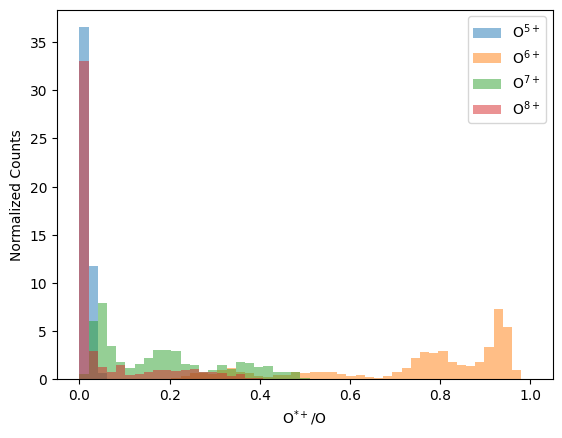

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,1)

fig, ax = plt.subplots()
ax.hist(df_data["O_CHARGES_5"], bins=x, label = r"O$^{5+}$", alpha=0.5, density=True)
ax.hist(df_data["O_CHARGES_6"], bins=x, label = r"O$^{6+}$", alpha=0.5, density=True)
ax.hist(df_data["O_CHARGES_7"], bins=x, label = r"O$^{7+}$", alpha=0.5, density=True)
ax.hist(df_data["O_CHARGES_8"], bins=x, label = r"O$^{8+}$", alpha=0.5, density=True)
ax.legend()
ax.set(ylabel = "Normalized Counts",xlabel=r"O$^{*+}$/O")